# [원문] [Crypto forecasting tutorial - carlos stein n brito](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)

This kernel is the Korean translation of [Crypto forecasting tutorial - carlos stein n brito](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition). Please refer to the link for the original text.

본 커널은 [Crypto forecasting tutorial - carlos stein n brito](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)의 한국어 번역본입니다. 원문을 보고 싶으시면 링크를 참고해주세요.

---
*원문을 번역하면서 부가 설명 및 설명을 위한 코드를 추가했습니다. 따라서 원문에는 없는 주석이나 내용이 포함되어 있을 수 있으니 참고 부탁드립니다.*

> Table of Contents
```
1. G-Research Crypto forecasting competition
   1-1. The Cryptocurrency Market(암호화폐 시장)
   1-2. Forecasting returns(수익 예측)
2. Dataset description(데이터셋 소개)
   2-1. Load the training set(학습 데이터 불러오기)
   2-2. Data features
   2-3. Candlestick charts(캔들 차트)
3. Preprocessing(전처리)
   3-1. Dealing with missing data(결측치 처리)
   3-2. Data visualization
   3-3. Log returns(로그 변환된 수익)
   3-4. Correlation between assets
4. Building your prediction model(예측 모델 구현)
   4-1. Prediction targets and evaluation
   4-2. Feature design
   4-3. Preparing the data for building predictive models
   4-4. Baseline model: Linear Regression(선형 회귀)
```

## 1. G-Research Crypto forecasting competition

[G-Research Crypto forecasting competition](https://www.kaggleusercontent.com/kf/78721864/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pLhgGXU4kw56ttAxAdOh2Q.Z3kMdL5jKOuvGqGPIDp272XUHrIC7OVW0MTjTi4IzYqJJqrPWJRInG6aKvMZJ_oDJ2N_ioNiR3OmnHU0MIoD99M-2TlPIkXtwVIqn6aXlKNoRQoLnUiHd583xLYosT1tcI2ThBsxigVMZQZf8iP4PgZz_ZRKHivlKpd63JtK_fmoLvPOGPrPgABA3Sq13_vxpM2htnVOc218zkrSV7189xeUl3r4PR-lG5r1Nqriyuht54us243c9Rwlh7yM0_Am29sq4NXkRoJbGSiHWC5VQnUzx1cqsJPhLG0t0P-AVbwZS2JixR29mqZ09bNGvIpSaEtDOn6Q7eXW7aIwzdJdq-O_FWEiUsd-lOFS_FfpIVShloTLL-zzWs-cc_IolYlrdVTI7JgED9IwvdcUxdySA6Neqzj55-jVwoYsla9gaT5tN_htxLgNkrBBL6Smo4yGrXfL59aEdWMxekTIhryN35d4Ayf7_L1_LOqyMoUskSC_HA8MSRnrJfBwg_bs8B8qB0dTOhFBe_CYbSohDV2hzlup3oPzjl5nb14sJArRjuScsgDr7w1cdpgRwQAJeVNl4Rnm_WxTvEWEhHwelvt5pbVv7zwaWxo2eKSYu2VGKDgF6nVyURq_kuBHk-ZfKyAKCnW_h8FtfoGir2VNIbFh9yzyCsLSKu1uUmXsHGf6JWT6dxT49DEm_thqtPBMIvKN.ew0nR2D55NdrgO0l-z3S3Q/link)에서 참가자들은 주요 암호화폐들에 대한 수익 예측에 도전합니다. 그리고 저희는 여러분의 원활한 참여를 돕기 위해 이번 예측 대회의 주요 사항들을 커버하는 튜토리얼 Notebook을 작성하기로 했습니다.

### 1-1. The Cryptocurrency Market(암호화폐 시장)

먼저, 암호화폐 세계에 대해 빠르게 소개하겠습니다. 암호화폐는 굉장히 인기가 많고 격한 시장으로, 투자자들에게 엄청난 수익(또는 그 반대)을 가져다 주기도 합니다. 많은 분들이 아실 비트코인이나 이더리움을 포함해 지금까지 수 천개의 암호화폐들이 만들어졌습니다.

CryptoCompare에 따르면(2021년 7월 25일 기준) 암호화폐는 지난 한 해 동안 매일 평균 거래량이 410억 달러로, 거래소에서 광범위하게 거래되었습니다.

암호 화폐들 간에 주요한 특징이 있다면, 가격 변동이 서로 연결되어 있다는 점입니다. 예를 들어 비트코인은 암호 화폐 시장의 가격 변동을 주로 이끌어왔지만, 다른 수 많은 코인도 이 추세와 함께 움직여왔습니다. 모든 코인이 서로 유기적으로 시장에 영향을 주고 있는 것입니다.

### 1-2. Forecasting returns(수익 예측)

금융 모델링의 가장 근본적인 목적은 가까운 미래에 가격이 어떻게 변할지 예측하기 위함입니다. 학습 데이터로 주어진, 과거부터 현재까지의 시계열 가격 데이터를 사용하여 가격이 상승할지 하락할지, 그리고 자산 수익률이 얼마나 될지 예측하고자 합니다.

이번 대회에서 캐글러들은 머신러닝 모델을 만들고 14개 대표 암호화폐들의 수익을 '분'에서 '시간' 단위로 예측하게 됩니다. 여러분은 수백만 행의 분당 암호화폐 거래 데이터에 접근할 수 있으며 이를 통해 14개 자산 모두에 대한 예측 모델을 동시에 설계할 수 있습니다. 경쟁이 종료된 후 3개월의 평가 기간 동안 수집된 실제 시장 데이터와 여러분의 예측이 얼마나 상관관계가 있는지에 따라 평가가 진행될 것입니다.

암호화폐 수익 예측은 여전히 풀리지 않은 문제입니다. 과한 변동성, 시계열 데이터의 비정상성, 시장과 밈 조작, 매우 빠르게 변화하는 시황과 자산간의 관계를 고려할 때 이는 매우 어려운 예측 작업입니다. 그러나 이렇게 어려운 문제인만큼 상당히 매력적인 머신러닝 영역이기도 합니다.

## 2. Dataset description(데이터셋 소개)

이제, 데이터를 살펴볼 것입니다. 먼저 대회 데이터셋을 불러와서 기본적인 요소들을 살펴보겠습니다.

### 2-1. Load the training set(학습 데이터 불러오기)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
data_folder = "../input/g-research-crypto-forecasting/"

# !는 쉘 명령어의 시작을 의미합니다. 쉘 명령에서는 $기호로 변수를 사용할 수 있습니다.
!ls $data_folder

asset_details.csv	       example_test.csv  supplemental_train.csv
example_sample_submission.csv  gresearch_crypto  train.csv


In [3]:
# pandas 라이브러리를 사용해 csv파일을 읽어옵니다.
# 읽어온 데이터는 데이터프레임으로 변환되어 crypto_df에 저장됩니다.
crypto_df = pd.read_csv(data_folder + 'train.csv')

In [4]:
# 데이터프레임에서 가장 상단 10개만 살펴봅니다.
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


데이터 세트의 각 행(row)에 유닉스 시간 타임스탬프 기준, 각 거래 데이터를 살펴볼 수 있습니다. 아래에서 더 자세히 살펴보겠습니다.

### 2-2. Data features

데이터셋에는 서로 다른 특성(여기서는 컬럼)이 있고, 이 특성들이 각 자산에 대한 정보를 보여주고 있습니다.
- **timestamp** : 모든 타임스탬프는 초 단위 Unix 타임스탬프(1970-01-01 00:00:00.000 UTC 이후 경과된 '초')로 반환됩니다. 이 데이터 세트의 타임스탬프는 60의 배수로 표현되어 있습니다. 즉, '분' 단위 데이터를 나타냅니다.
- **Asset_ID** : Asset ID는 각 암호화폐와 매핑되어 있습니다(예를 들어 Asset_ID 1은 비트코인). `asset_details.csv` 파일에서 매핑 정보를 상세히 볼 수 있습니다.
- **Count** : 각 타임스탬프별 거래 수를 의미합니다(분 단위 총 거래 수).
- **Open** : USD(달러) 단위 시가.
- **High** : 매 분마다 도달한 USD(달러) 단위 고가.
- **Low** : 매 분마다 도달한 USD(달러) 단위 저가.
- **Close** : USD(달러) 단위 종가.
- **Volume** : 매수, 매도 수량.
- **VWAP** : VWAP는 거래량 가중 평균 가격(Volume Weighted Average Price)을 의미합니다. 즉, 시간 간격 동안 자산의 평균 가격으로, 거래량으로 가중된 수치를 보여줍니다.
- **Target** : 15분 단위의 log변환된 잔여이익(residual returns)을 보여줍니다. *(여기서 잔여이익이란 수수료 등을 제외하고 얻은 순이익을 뜻합니다.)*

처음 2개 컬럼(timestamp, Asset_ID)은 각 행마다 시간과 자산 인덱스를 표시하고 있습니다. 중간 6개 컬럼(Count, Open, High, Low, Close, Volume)은 분 단위 자산의 거래 정보를 담고 있습니다. 마지막 컬럼(Target)은 우리가 예측할 타겟 정보입니다.

다음으로 데이터셋에 포함된 모든 암호화폐 자산 목록을 매핑된 ID와 함께 평가 지표에서 상대적 중요성을 평가하는 데 사용된 각 자산의 가중치를 확인하겠습니다.



In [5]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


보기 쉽게 Asset_ID 순으로 정렬해주겠습니다.

In [6]:
# ignore_index를 True로 주지 않으면 현재의 인덱스가 컬럼으로 들어오게 됩니다.
# 인덱스는 0부터 새롭게 만들고 기존 인덱스는 버릴 것이니 True 옵션을 주겠습니다.
asset_details = asset_details.sort_values('Asset_ID', ignore_index=True)
asset_details

,Asset_ID,Weight,Asset_Name
0,0,4.304065,Binance Coin
1,1,6.779922,Bitcoin
2,2,2.397895,Bitcoin Cash
3,3,4.406719,Cardano
4,4,3.555348,Dogecoin
5,5,1.386294,EOS.IO
6,6,5.894403,Ethereum
7,7,2.079442,Ethereum Classic
8,8,1.098612,IOTA
9,9,2.397895,Litecoin


새롭게 정렬된 인덱스가 생겼으니 기존 인덱스 컬럼은 삭제합니다.

### 2-3. Candlestick charts(캔들 차트)

일반적으로 거래 데이터는 시가, 고가, 저가, 종가가 합쳐진 형태로 보여지게 되고 트레이더는 이러한 데이터를 보고 기술적 분석을 할 수 있습니다. 우리도 파이썬을 사용해 캔들 바 형태로 차트를 그릴 수 있습니다. 

캔들의 길이는 하루 간 시가와 종가를 나타내고, 캔들이 붉은색이면 종가가 시가보다 낮다는 것을 의미합니다. 즉, 장이 시작할 때보다 마감했을 때 가격이 떨어졌다는 것입니다. 초록색이면 그 반대입니다. 이들은 강세 및 약세 촛대라고도합니다. 막대 위와 아래의 심지(막대를 벗어난 선 부분)는 해당 일자 거래의 높은 가격과 낮은 가격을 보여줍니다. 즉, 장 중에 시가와 종가 간격을 벗어난 부분입니다.

파이썬 plotly 라이브러리를 사용하여 비트코인 가격의 각각 조각(캔들)을 시각화할 수 있습니다. 시각화 하단에는 그래프를 확대하는 데 사용할 수 있는 범위 슬라이더가 표시됩니다.

시각화 전에 잠시 데이터프레임에서 일부를 추출하는 방법을 배워보겠습니다. pandas는 기본적으로 2가지 방법을 제공합니다. 

1. 먼저 데이터프레임을 직접 조작하는 방식입니다.

In [7]:
# 예시를 위해 상위 5개 항목만 추출합니다.
crypto_df[crypto_df["Asset_ID"]==1].head(5)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


2. 다른 방식으로는, 좀 더 직관적인 query문법을 사용할 수 있습니다.

In [8]:
# 예시를 위해 상위 5개 항목만 추출합니다.
crypto_df.query("Asset_ID==1").head(5)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


정확히 같은 결과를 반환하니 익숙한 방식으로 사용하면 되겠습니다. 여기서는 가독성을 위해 query 문법을 주로 사용하겠습니다. 

이제 본격적으로 캔들차트를 그려보겠습니다.

In [9]:
# 여기서는 비트코인(Asset_ID == 1) 시세를 캔들 차트로 그려봅니다.
# set_index 함수를 연결해 timestamp 컬럼을 인덱스로 사용하겠습니다.
btc = crypto_df.query("Asset_ID==1").set_index("timestamp")

# 추출한 비트코인 시세 중 최근 200일치만 btc_mini 변수에 담습니다.
btc_mini = btc.iloc[-200:]
# tail 함수를 사용하면 최근 5개 항목만 살펴볼 수 있습니다.
btc_mini.tail(5)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN
1632182340,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN
1632182400,1,2698.0,43009.961250,43048.510000,42961.64,43002.505000,128.206820,43011.414052,NaN


일반적으로 시계열 데이터는 이렇게 시간축(여기서는 `timestamp` 컬럼)을 인덱스로 놓고 분석하게 됩니다.

In [10]:
import plotly.graph_objects as go

# index(timestamp)를 x축으로 놓고 시가/고가/저가/종가 데이터를 입력해줍니다.
fig = go.Figure(
    data=[go.Candlestick(
            x=btc_mini.index,
            open=btc_mini['Open'],
            high=btc_mini['High'],
            low=btc_mini['Low'],
            close=btc_mini['Close']
        )]
    )

fig.show()

## 3. Preprocessing(전처리)

### 3-1. Dealing with missing data(결측치 처리)

머신러닝 전처리 작업에서 결측치 처리는 매우 중요한 부분입니다. 데이터가 시계열 형태라면 꼭 머신러닝을 위해서가 아니더라도 반드시 결측치 처리를 해줘야 하는데, 시간 간격마다 온전하게 정보가 채워져있어야 정상적인 분석이 가능하기 때문입니다.

이번에는 이더리움 가격 데이터를 가지고 결측치를 다뤄보도록 하겠습니다.

In [11]:
# 이더리움의 Asset_ID는 6번입니다.
eth = crypto_df.query("Asset_ID==6").set_index("timestamp")

# 결측치 여부를 확인하기 위해 show_counts 옵션을 True로 지정하겠습니다.
# 해당 옵션을 지정해줌으로써 아래 출력되는 값 중 Non-Null Count 부분이 보여지게 됩니다.
eth.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


`Target` 컬럼을 자세히 보면 다른 컬럼들보다 숫자가 적다는 것을 알 수 있습니다. 하지만 보기 어려우니 결측치를 확인할 때에는 결측치 수만 따로 한번 더 확인해주는 것이 좋습니다.

In [12]:
eth.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      340
dtype: int64

시계열 데이터의 경우 특정 시간대가 빠져있는 것도 주의해야 합니다. 비트코인과 이더리움의 시간 범위를 비교하여 차이가 있는지 확인해보겠습니다.

그 전에, 유닉스 시간 표현은 사람이 인지하기 어려우니 년-월-일-시간으로 표시해볼텐데 아래와 같이 astype 함수를 사용하면 되겠습니다.

In [13]:
btc.index[0].astype('datetime64[s]')

numpy.datetime64('2018-01-01T00:01:00')

이 방식으로 비트코인 가격이 기록된 시간 범위, 이더리움 가격이 기록된 시간 범위를 동시에 확인하겠습니다.

In [14]:
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')

beg_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')

print('BTC : \n', f'{beg_btc} ~ {end_btc}')
print('ETH : \n', f'{beg_eth} ~ {end_eth}')

if (beg_btc == beg_eth) and (end_btc == end_eth):
    print(">>Data intervals match.")

BTC : 
 2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
ETH : 
 2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
>>Data intervals match.


우선 시간 범위(시작~끝)는 괜찮은 것 같습니다. 다음으로 timestamp는 60초 단위로 기록되어야 하는데, 그렇지 않은 데이터 행이 있는지 여부를 파악해보겠습니다.

아래와 같이 2번째 데이터부터 마지막 데이터, 그리고 1번째 데이터부터 마지막 바로 앞 데이터를 빼면 각 데이터가 몇 초 단위로 기록되어 있는지 확인할 수 있습니다.

즉 `2번째 데이터 - 1번째 데이터`, `3번째 데이터 - 2번째 데이터`와 같은 식입니다.

In [15]:
eth.index[1:] - eth.index[:-1]

Int64Index([60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
            ...
            60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
           dtype='int64', name='timestamp', length=1956199)

이제 이를 확장할 수 있습니다. 두 데이터의 차이가 60초인 경우를 포함한 모든 경우의 수를 아래 코드로 카운트해볼 수 있습니다.

In [16]:
# value_counts() 함수는 pandas Series 타입 데이터에서 unique한 값을 카운트해줍니다.
(eth.index[1:] - eth.index[:-1]).value_counts()

60      1956043
120         100
180          23
300           5
540           4
240           3
360           2
480           2
600           2
2220          1
420           1
780           1
900           1
1380          1
2580          1
1320          1
1980          1
1020          1
1860          1
7200          1
960           1
4740          1
3120          1
1080          1
Name: timestamp, dtype: int64

시계열 데이터를 분석할 때에는 반드시 데이터의 시간 간격이 일정해야 하기 때문에 시간 간격이 일정하지 않은 부분을 1분 간격으로 채워줄 것입니다. 인덱스를 기존 인덱스의 시작과 끝을 동일하게 하되, 중간 간격을 1분(60초) 간격으로 맞춰줍니다.

아래와 같이 range 함수를 사용하면 처음과 끝을 지정하고 '60' 간격으로 숫자 배열을 만들어낼 수 있습니다. 여기서는 10개만 간단히 보여주기 위해 count로 반복문을 제어합니다.

In [17]:
count = 0
for i in range(eth.index[0], eth.index[-1]+60, 60):
    print(i)
    count += 1
    if count == 10:
        break

1514764860
1514764920
1514764980
1514765040
1514765100
1514765160
1514765220
1514765280
1514765340
1514765400


그런데, 이렇게 60 간격으로 모든 인덱스를 다시 맞춰주면, 기존에 없는 인덱스에 해당하는 값들은 모두 비워져있을 것입니다. reindex()함수에서 method 옵션을 `pad`로 주면 forward filling, 즉 앞쪽의 데이터를 사용해 빈 값을 채워주는 방식으로 null이 생기지 않도록 합니다.

In [18]:
eth_fill_range = range(eth.index[0], eth.index[-1]+60, 60)
eth = eth.reindex(eth_fill_range, method='pad')

# 60 간격의 데이터만 남아있는지 앞에서 진행했던 방법으로 다시 확인합니다.
(eth.index[1:] - eth.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

마찬가지로 비트코인 가격 데이터도 비어있는 시간 간격을 확인하고, 채워주겠습니다.

In [19]:
# 우선 비어있는 부분을 확인해줍니다.
(btc.index[1:] - btc.index[:-1]).value_counts()

60      1956136
120          78
180          12
240          11
420           9
360           4
600           4
480           3
720           3
840           3
300           3
540           2
1620          2
1800          2
1080          2
2220          1
660           1
1560          1
1020          1
1200          1
2400          1
1440          1
Name: timestamp, dtype: int64

In [20]:
# 이더리움과 같은 방식으로 비트코인도 비어있는 구간을 채워줍니다.
btc_fill_range = range(btc.index[0], btc.index[-1]+60, 60)
btc = btc.reindex(btc_fill_range, method='pad')

# 정상적으로 1분 간격 시계열 데이터가 구성되었는지 다시 확인합니다.
(btc.index[1:] - btc.index[:-1]).value_counts()


60    1956959
Name: timestamp, dtype: int64

### 3-2. Data visualization

비트코인, 이더리움 가격 데이터의 시간 축을 동일하게 구성하는데 성공했습니다. 이번에는 이렇게 만든 데이터로 두 암호화폐의 종가를 시각화해보겠습니다.

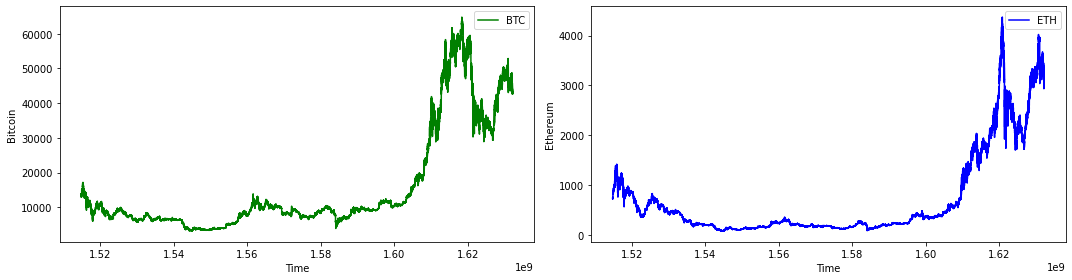

In [21]:
import matplotlib.pyplot as plt

# 시각화 공간을 15 x 4 크기로 만든다.
f = plt.figure(figsize=(15,4))

# 전체 시각화 공간을 1행 2열로 분할하고 그 중 1번째 공간을 변수 'ax1'에 할당하겠습니다.
ax1 = f.add_subplot(121)
# 공간 할당된 ax1에 비트코인 종가 그래프를 그립니다.
plt.plot(btc['Close'], label='BTC', color='green')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

# 앞에서 전체 시각화 공간을 1행 2열로 분할했었습니다. 그 중 2번째 공간을 변수 'ax2'에 할당하겠습니다.
ax2 = f.add_subplot(122)
# 공간 할당된 ax2에 비트코인 종가 그래프를 그립니다.
plt.plot(eth['Close'], label='ETH', color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

# 두 그래프 사이 간격을 좁혀줍니다.
plt.tight_layout()
# 그래프를 출력합니다.
plt.show()

두 그래프는 시계열상 차이가 꽤 있습니다. 우리는 두 그래프의 최근 상관관계를 자세히 살펴볼 것입니다.

먼저, 유닉스 타임스탬프를 쉽게 다루려면 우리의 '시간 표현'을 유닉스 타임스탬프로 변환하는 방식을 배워야 합니다. 간단하게 datetime.strptime() 함수를 사용하여 문자열로 제공한 시간 표현을 파이썬의 datetime 타입으로 변환할 수 있습니다.

In [22]:
datetime.strptime('01/06/2021', "%d/%m/%Y")

datetime.datetime(2021, 6, 1, 0, 0)

이렇게 datetime 타입으로 변환해주면 깔끔하게 정리된 형태로 아래와 같이 출력할 수 있습니다.

In [23]:
print(datetime.strptime('01/06/2021', "%d/%m/%Y"))

2021-06-01 00:00:00


이 함수는 2번째 인자의 의미를 잘 이해하면 사용하기 쉽습니다. 자세히 보면 2번째 인자는 1번째 인자, 즉 우리가 전달한 문자열이 어떤 형태로 날짜를 표시하고 있는지 format을 정의하고 있습니다. 그러니까 format만 정확히 지정해준다면 원하는 형태로 편하게 문자열을 던져줄 수 있습니다. 

In [24]:
print(datetime.strptime('01..06..2021', '%d..%m..%Y'))
print(datetime.strptime('01..//06..//2021', '%d..//%m..//%Y'))
print(datetime.strptime('01<<06<<2021', '%d<<%m<<%Y'))

2021-06-01 00:00:00
2021-06-01 00:00:00
2021-06-01 00:00:00


극단적으로 이상한 형태로 문자열을 넣어줘도 format 형식에 따라 잘 출력된 것을 볼 수 있습니다. format을 이해했다면 아래와 같이 일/월/연 순서를 지키지 않아도 괜찮다는 것을 알 수 있습니다.

In [25]:
print(datetime.strptime('06..01..2021', '%m..%d..%Y'))
print(datetime.strptime('2021..//06..//01', '%Y..//%m..//%d'))
print(datetime.strptime('2021<<01<<06', '%Y<<%d<<%m'))

2021-06-01 00:00:00
2021-06-01 00:00:00
2021-06-01 00:00:00


더 나아가서 datetime 타입은 timetuple() 함수를 사용할 수 있습니다. 이 함수를 사용하면 각 시간 단위를 마치 튜플처럼 나열할 수 있습니다.

In [26]:
time_sample = datetime.strptime('01/06/2021', "%d/%m/%Y")
time_sample.timetuple()

time.struct_time(tm_year=2021, tm_mon=6, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=152, tm_isdst=-1)

마침내 이렇게 분할된 시간 정보를 time 라이브러리를 사용해 유닉스 시간으로 변경해줄 수 있습니다.

In [27]:
import time

time.mktime(time_sample.timetuple())

1622505600.0

이렇게 얻은 유닉스 시간은 우리의 시계열 데이터를 구간 분할하는 데에 사용할 수 있습니다. 즉, 지금부터 우리의 입맛대로 인덱싱이 가능해졌다는 뜻입니다.

2021년 6월 1일 하루간의 시계열 데이터만 추출해서 시각화해보겠습니다.

In [28]:
# 문자열을 유닉스 시간으로 변환하는 코드를 람다 함수로 만들겠습니다.
# 문자열 포멧은 %d/%m/%Y 로 지정했습니다.
totimestamp = lambda s : np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

In [29]:
btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

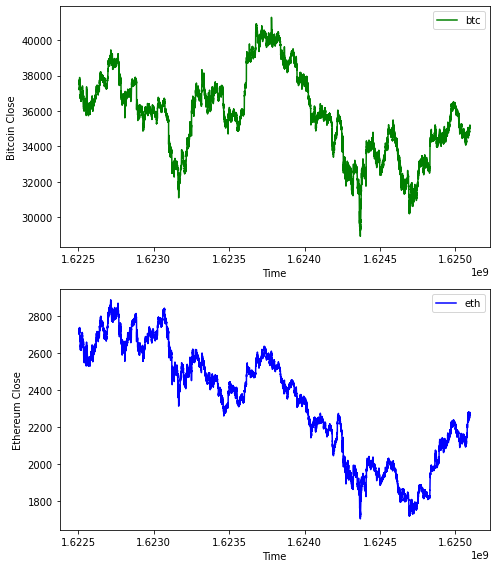

In [30]:
# 7x8 크기의 시각화 공간을 할당받습니다.
f = plt.figure(figsize=(7,8))

# 2행 1열로 시각화 공간을 나누고 그 중 1번째 공간을 ax1 변수로 제어합니다.
ax1 = f.add_subplot(211)
# ax1 공간에 2021년 6월 1일 비트코인 가격 차트를 그립니다.
plt.plot(btc_mini_2021['Close'], label='btc', color='green')
plt.legend() # label을 표시합니다
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')

# 앞에서 2행 1열로 시각화 공간을 나눴습니다. 그 중 2번째 공간을 ax2 변수로 제어합니다.
ax2 = f.add_subplot(212)
plt.plot(eth_mini_2021['Close'], label='eth', color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Close')

plt.tight_layout() # 두 그래프 사이 간격을 좁힙니다.
plt.show()

짧은 간격으로 그려보니 시각적으로 상승 하락 추세가 유사한 지점들이 보입니다. 좀 더 자세히 확인하기 위해 우리는 수익을 계산해볼 수도 있습니다.

### 3-3. Log returns(로그 변환된 수익)

자산에 대한 가격 변동을 분석하기 위해 우리는 가격의 차이를 계산할 수도 있습니다. 그러나 서로 다른 자산(ex 비트코인과 이더리움)은 각각 다른 가격대에서 움직이기 때문에 정확히 비교하기 어렵습니다. 우리는 `수익률`이라고도 하는 `가격의 백분율 변화`를 대신 계산하여 이 문제를 해결할 수 있습니다. 우리가 투자했을 때 백분율로 표시되는 그것입니다.

일반 수익률은 금융에서 널리 사용되지만 `로그 수익률`은 시간에 따라 누적되기 때문에 시계열의 수학적 모델링에서 선호합니다. 또한 일반 수익률은 -100% 아래로 떨어질 수 없지만 로그 수익률은 그 제한이 없습니다.

로그 수익을 계산하기 위해 단순히 두 개의 연속된 가격 사이 비율을 로그를 취할 수 있습니다. 첫 번째 행은 이전 값을 알 수 없으므로 빈 반환값을 가지므로 해당 데이터 포인트는 제거할 것입니다.

In [31]:
# 로그 변환 처리를 위해 함수를 만들어줍니다.
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

다음으로 두 자산에 대한 로그 수익률을 시각화하겠습니다. 이 시각화를 통해 로그 수익률이 기존 가격 시계열 그래프에 비해 drift가 적고, white noise 에 가깝게 그려지는 것을 볼 수 있습니다. (*white noise란 자기상관성이 없는 시계열 데이터를 말하며 drift는 y절편 혹은 편향을 의미합니다. 특정 추세나 방향이 없이 잔차 `e` 만 걸러낸 형태로 볼 수도 있습니다.*)

In [32]:
import scipy.stats as stats

# log return btc --> lret_btc 로 표현했습니다.
# log_return 함수는 우리가 위에서 미리 만들어둔 함수로, 내부적으로 diff 함수를 사용하기 때문에 첫번째 row는 버립니다.
# 첫번째 row(행)를 버리는 이유는 해당 데이터 포인터는 null이 들어가 있기 때문입니다.(이전 데이터가 없으므로 null이 채워짐)
lret_btc = log_return(btc_mini_2021['Close'])[1:]
lret_eth = log_return(eth_mini_2021['Close'])[1:]

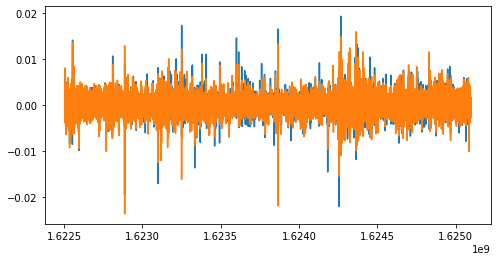

In [33]:
# lret_btc(Series 타입)의 이름은 'Close'인 상태입니다. 이름을 변경해줍니다.
lret_btc.rename('lret_btc', inplace=True)
# lret_eth(Series 타입)의 이름도 'Close'인 상태입니다. 이름을 변경해줍니다.
lret_eth.rename('lret_eth', inplace=True)

# 8x4 크기로 시각화 합니다.
plt.figure(figsize=(8,4))
# 한 공간에 2개 그래프를 겹쳐 그립니다.
plt.plot(lret_btc)
plt.plot(lret_eth)
plt.show()

### 3-4. Correlation between assets

우리는 암호화폐 자산 수익이 약간의 상관 관계를 보여준다는 가설을 세웠습니다. 지금부터 비트코인과 이더리움 간의 기간에 따른 상관관계를 시각화를 통해 확인해보겠습니다.

In [34]:
# 앞에서 했던 것과 같은 방식으로 로그 수익을 구해줄 것입니다.
# 단, 이번에는 하루가 아닌 전체 기간을 처리해줍니다.
lret_btc_long = log_return(btc['Close'])[1:]
lret_eth_long = log_return(eth['Close'])[1:]

# 시리즈 데이터 이름을 Close에서 각 데이터에 맞게 바꿔줍니다.
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)

# 두 데이터를 병합합니다. 
two_assets = pd.concat([lret_btc_long, lret_eth_long], axis=1)
two_assets

,lret_btc,lret_eth
timestamp,,
1514764920,-0.001595,-0.000335
1514764980,-0.001939,-0.001027
1514765040,-0.002414,-0.000543
1514765100,-0.003137,-0.001898
1514765160,-0.000569,-0.000687
...,...,...
1632182160,-0.002007,-0.003137
1632182220,-0.000910,-0.001305
1632182280,-0.000770,-0.001165


corr()함수를 사용하면 상관관계를 수치로 확인할 수 있습니다.

In [35]:
two_assets.corr()

,lret_btc,lret_eth
lret_btc,1.000000,0.568814
lret_eth,0.568814,1.000000


그러나 우리는 기간에 따라 상관관계가 어떻게 변하는지 확인해보고 싶습니다. 이럴 때는 groupby()함수로 시계열 구간을 나눠준 다음 corr()함수를 사용하면 되겠습니다.

In [36]:
# 타임스탬프는 60초 간격입니다. 
# 60의 배수(여기서는 600,000)로 나눈 나머지로 묶게 되면 시간순으로 구획별 상관도를 확인할 수 있습니다.
# ex. 유닉스 시간이 60만보다 작은 1번째 구간, 60만보다 크고 120만보다 작은 2번째 구간 ...
two_assets.groupby(two_assets.index//(60*10000)).corr()

lret_btc  lret_eth
timestamp                             
2524      lret_btc  1.000000  0.212106
          lret_eth  0.212106  1.000000
2525      lret_btc  1.000000  0.369729
          lret_eth  0.369729  1.000000
2526      lret_btc  1.000000  0.766609
...                      ...       ...
2718      lret_eth  0.893232  1.000000
2719      lret_btc  1.000000  0.847503
          lret_eth  0.847503  1.000000
2720      lret_btc  1.000000  0.871091
          lret_eth  0.871091  1.000000

[394 rows x 2 columns]

그래프로 표현하기 위해서는 시간에 따른 lret_btc와 lret_eth의 상관데이터가 필요합니다. 위 표에서 상관데이터가 교차로 중복해서 표현되어 있기 때문에(btc대eth, btc대btc, eth대btc, eth대eth) 그 중 btc대eth 혹은 eth대btc 하나만 가져오면 되겠습니다. 인덱싱은 아래와 같이 할 수 있습니다.

In [37]:
# lret_btc 열을 인덱싱하면 lret_btc와 lret_btc, lret_btc와 lret_eth 데이터가 추출됩니다.
# 그 중 lret_eth 데이터만 한번 더 인덱싱하는 코드입니다.
two_assets.groupby(two_assets.index//(60*10000)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

timestamp
2524    0.212106
2525    0.369729
2526    0.766609
2527    0.811680
2528    0.743049
          ...   
2716    0.845120
2717    0.789271
2718    0.893232
2719    0.847503
2720    0.871091
Name: lret_btc, Length: 197, dtype: float64

이제 시간에 따른 두 자산(비트코인, 이더리움)의 상관도를 그래프로 그려보겠습니다.

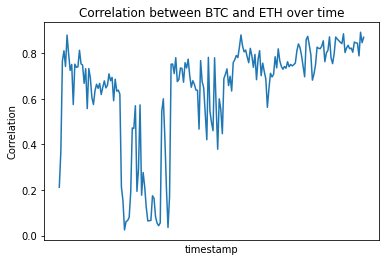

In [38]:
corr_time = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

corr_time.plot()
plt.xticks([])
plt.ylabel("Correlation")
plt.title("Correlation between BTC and ETH over time")
plt.show()

위 그래프에서 상관관계가 크고, 또 가변적이라는 사실에 주목할 것입니다. 시간이 지남에 따라 상관관계가 역동적으로 변화하는 모습을 보여주고 있습니다. 따라서 이 시계열 문제, 즉 "`비정상성` 시계열 데이터에서 어떻게 예측을 수행할 것인가"가 본 대회의 핵심이 되겠습니다.(*`정상성`은 평균, 분산 및 자기상관과 같은 시계열 속성들이 시간이 지남에 따라 변하지 않는 것을 가정합니다. 반면에, `비정상성`은 시간이 지남에 따라 통계적 속성에 지속적인 변화가 있는 경우를 말합니다. 많은 유용한 분석 도구, 통계 테스트 및 모델이 `정상성`에 의존하기 때문에 `정상성`은 시계열 분석에서 매우 중요한 요소입니다.*)

이번에는 상관 행렬을 시각화하여 자산 간의 상관 관계를 확인해보겠습니다. 일부 자산 쌍에서 상관 관계가 높게 나온다면 주의 깊게 살펴볼 필요가 있습니다. 여기서는 2021년 1월 1일 ~ 2021년 1월 4일까지의 데이터만 가지고 확인합니다.

In [39]:
# 빈 데이터프레임을 초기화합니다.
all_assets_2021 = pd.DataFrame([])

for asset_id, asset_name in zip(asset_details['Asset_ID'], asset_details['Asset_Name']):
    # 하나의 암호화폐 정보를 timestamp를 인덱스로 하여 추출합니다.
    asset = crypto_df.query(f"Asset_ID=={asset_id}").set_index("timestamp")
    
    # 기간은 2021년 1월 1일~4일까지만 가져옵니다.
    asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
    
    # 60일 간격으로 데이터를 맞춰주고, 빈 값은 바로 직전 값으로 채워줍니다.
    asset_range = range(asset.index[0], asset.index[-1]+60, 60)
    asset = asset.reindex(asset_range, method='pad')
    
    # 빈 값이 있을 수 있습니다. 오류가 나지 않도록 0으로 채워주고 로그 수익률로 변환합니다.
    # 변환 후 첫번째 값은 NaN일 것이므로 제거합니다.(diff 계산이므로)
    lret = log_return(asset['Close'].fillna(0))[1:]
    
    # pandas를 사용해 outer join 방식으로 데이터를 병합합니다.(outer join은 양쪽 데이터를 누락없이 모두 표시하는 방식입니다.)
    # 추가된 열의 컬럼명에 asset_name, 즉 암호화폐 이름을 붙여줍니다.
    all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how='outer')

In [40]:
# 병합한 데이터를 살펴보겠습니다.
all_assets_2021.corr()

,Close,CloseBitcoin,CloseBitcoin Cash,CloseCardano,CloseDogecoin,CloseEOS.IO,CloseEthereum,CloseEthereum Classic,CloseIOTA,CloseLitecoin,CloseMaker,CloseMonero,CloseStellar,CloseTRON
Close,1.000000,0.552438,0.528535,0.503102,0.218515,0.520331,0.555004,0.217757,0.395007,0.550942,0.392032,0.459854,0.436564,0.443682
CloseBitcoin,0.552438,1.000000,0.668397,0.577373,0.295093,0.590395,0.808571,0.244929,0.439920,0.732416,0.455475,0.555275,0.517695,0.498138
CloseBitcoin Cash,0.528535,0.668397,1.000000,0.554523,0.264605,0.687284,0.694308,0.280523,0.430126,0.739045,0.441942,0.536247,0.513843,0.533490
CloseCardano,0.503102,0.577373,0.554523,1.000000,0.234248,0.536683,0.601954,0.221725,0.410619,0.584526,0.410004,0.483596,0.545413,0.464596
CloseDogecoin,0.218515,0.295093,0.264605,0.234248,1.000000,0.248993,0.282657,0.108567,0.179939,0.273803,0.188695,0.214233,0.211031,0.217022
CloseEOS.IO,0.520331,0.590395,0.687284,0.536683,0.248993,1.000000,0.619467,0.272892,0.423243,0.655300,0.415298,0.510208,0.519521,0.561618
CloseEthereum,0.555004,0.808571,0.694308,0.601954,0.282657,0.619467,1.000000,0.261277,0.453711,0.754474,0.493190,0.556682,0.536905,0.517412
CloseEthereum Classic,0.217757,0.244929,0.280523,0.221725,0.108567,0.272892,0.261277,1.000000,0.183346,0.271644,0.184502,0.220836,0.209983,0.222593
CloseIOTA,0.395007,0.439920,0.430126,0.410619,0.179939,0.423243,0.453711,0.183346,1.000000,0.438804,0.328212,0.382971,0.380862,0.373290
CloseLitecoin,0.550942,0.732416,0.739045,0.584526,0.273803,0.655300,0.754474,0.271644,0.438804,1.000000,0.452517,0.548028,0.526598,0.531681


위에서 join 함수의 동작과 옵션을 처음 봤더라도 만들어진 표 결과를 보면 이해할 수 있습니다. rsuffix 옵션을 통해 모든 열의 기존 컬럼 명인 `Close` 뒤에 이어서 asset_name이 붙었고, 순차적으로 각 열이 반복문을 통해 생성되며 오른쪽에 연결되었습니다.

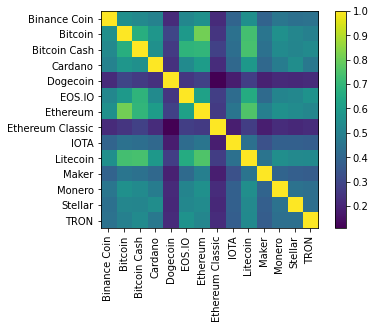

In [41]:
plt.imshow(all_assets_2021.corr())

# 위 표에서 asset 이름들 앞에 Close라는 단어가 모두 붙어있습니다. 표로 그릴 때는 기존의 Asset_Name만 잘 표시되게 아래와 같이 코드를 작성합니다.
plt.yticks(asset_details['Asset_ID'].values, asset_details['Asset_Name'].values)

# x축은 rotation 옵션을 주어서 글자가 겹치지 않게 90도로 틀어줍니다.
plt.xticks(asset_details['Asset_ID'].values, asset_details['Asset_Name'].values, rotation='vertical')

# 색상의 의미를 수치로 알려준 colorbar를 우측에 표시합니다.
plt.colorbar()
plt.show()

본 튜토리얼에서의 통계분석은 여기까지 간단하게만 진행했습니다. 본 데이터가 `비정상성`을 띄는 점을 고려하여 자기 상관, 시계열 분해 및 정상성 테스트를 포함하여 데이터 세트를 더 잘 파악하기 위해 추가 통계 분석을 수행할 것을 권장합니다.

## 4. Building your prediction model(예측 모델 구현)

### 4-1. Prediction targets and evaluation

이번 예측 대회의 목표는 각각 암호화폐 자산 $a$에 대하여 가까운 미래의 가격 $P^a$에서의 수익을 예측하는 것입니다. 데이터셋의 각 행에서 보면 우리가 예측해야 하는 부분은 `Target`입니다.

`Target`은 15분 단위의 로그 수익 ($R^a$)로 계산됩니다.

$$R^a(t) = log (P^a(t+16)\ /\ P^a(t+1))$$
 
각 암호화폐 자산 수익은 서로 상관관계가 높으며 이러한 특징은 전체 암호화폐 시장에 크게 영향을 줍니다. 따라서 여러분의 개별 자산에 대한 수익률 예측 능력을 평가하기 위해 `target`을 생성할 때 개별 자산 수익률에서 시장 신호를 제거하는 방식으로 linear residualization을 수행합니다. 더 자세히는, 만약 𝑀(𝑡)가 가중평균된 시장 수익이라면 `target`은 다음과 같이 계산됩니다.

$$M(t) = \frac{\sum_a w^a R^a(t)}{\sum_a w^a}  \\
\beta^a = \frac{\langle M \cdot R^a \rangle}{\langle M^2 \rangle} \\
\text{Target}^a(t) = R^a(t) - \beta^a M(t)$$

위 식에서 괄호  $\langle .\rangle$ 는 3750분 단위의 이동평균을 의미하며 평가 지표에 동일한 가중치($w^a$)를 사용했습니다.

미래 가격의 누락된 값으로 인해 일부 행에서 null 값이 발생할 수 있습니다. null이 있는 행은 점수를 매기기 위해 무시될 것입니다.

이번 대회에서 여러분이 제출한 예측 결과는 자산 세부 정보 파일(`asset_details.csv`)의 가중치 열(`Weight`)에 의해 주어진 가중치와 함께 가중치가 적용된 피어슨 상관 계수로 평가됩니다.

본 튜토리얼에서는 문제를 조금 단순화하겠습니다. 가중치를 고려하지 않은 상관 관계를 사용하고, BTC와 ETH의 두 가지 자산만 고려합니다.

### 4-2. Feature design

먼저 모델에 입력할 몇 가지 관련 Feature들을 설계하겠습니다.

In [42]:
# 거래데이터로부터 모델에 넣어줄 입력 피처들을 선정합니다.
# 입력 피처는 4개입니다 : 5분 단위 로그 수익률, 1분 단위 로그 수익률의 절대값, 캔들 윗꼬리와 아랫꼬리

# 먼저 윗꼬리, 아랫꼬리 피처를 생성해줄 함수를 만들겠습니다.
# 윗꼬리는 고가에서 몸통 윗부분까지입니다. 따라서 시가와 종가 중 큰 값과 고가를 비교해주면 됩니다.
upper_shadow = lambda asset: asset['High'] - np.maximum(asset['Close'], asset['Open'])
# 아랫꼬리는 몸통 아랫부분부터 저가까지입니다. 따라서 시가와 종가 중 낮은 값과 저가를 비교해주면 됩니다.
lower_shadow = lambda asset: np.minimum(asset['Close'], asset['Open']) - asset['Low']

# 비트코인 : 선정한 4개 입력 피처를 데이터프레임으로 묶어줍니다.
X_btc = pd.concat([
    log_return(btc['VWAP'], periods=5),
    log_return(btc['VWAP'], periods=1).abs(),
    upper_shadow(btc),
    lower_shadow(btc)
], axis=1)

# 이더리움 : 동일합니다.
X_eth = pd.concat([
    log_return(eth['VWAP'], periods=5),
    log_return(eth['VWAP'], periods=1).abs(),
    upper_shadow(eth),
    lower_shadow(eth)
], axis=1)

# 마지막으로 비트코인과 이더리움 각각에 대해 예측할 y값을 변수에 담아주겠습니다.
y_btc = btc['Target']
y_eth = eth['Target']

위 코드를 실행하면 아래와 같이 데이터셋이 구성됩니다.

In [43]:
X_btc

,VWAP,VWAP,0,1
timestamp,,,,
1514764860,NaN,NaN,163.624000,169.084000
1514764920,NaN,0.000961,217.264000,148.102000
1514764980,NaN,0.002481,176.500000,200.314000
1514765040,NaN,0.001629,196.488000,191.760000
1514765100,NaN,0.003489,189.900000,170.474000
...,...,...,...,...
1632182160,0.000074,0.001123,18.070849,20.752857
1632182220,-0.001954,0.001303,27.802857,19.845714
1632182280,-0.002773,0.000828,28.114286,29.820000


In [44]:
y_btc

timestamp
1514764860   -0.014643
1514764920   -0.015037
1514764980   -0.010309
1514765040   -0.008999
1514765100   -0.008079
                ...   
1632182160         NaN
1632182220         NaN
1632182280         NaN
1632182340         NaN
1632182400         NaN
Name: Target, Length: 1956960, dtype: float64

비트코인의 경우, 우리는 X_btc 데이터로 y_btc를 예측하게 됩니다. 이더리움도 마찬가지입니다.

## 4-3. Preparing the data for building predictive models

우리는 지도학습 방식의 선형 회귀 모델을 학습시킬 것이므로 우선 학습 데이터와 평가 데이터를 나눠줘야합니다. X와 y의 크기를 고려해 두 개의 데이터셋으로 분리해보겠습니다.

In [45]:
# 먼저 분리할 지점, 즉 시간 범위를 지정해줍니다.
# 여기서는 50:50으로 나눠줍니다. 학습데이터는 5월, 평가데이터는 6월로 지정합니다.
train_window = [totimestamp("01/05/2021"), totimestamp("30/05/2021")]
test_window = [totimestamp("01/06/2021"), totimestamp("30/06/2021")]

# 이제 지정한 시간 범위대로 비트코인, 이더리움 각각 학습/평가 데이터를 생성해줍니다.
# 단, 여기서 우리의 목표는 아주 단순한 회귀 모델을 만드는 것이므로 window size는 1로 합니다.
# (시계열 데이터에 window size는 매우 중요합니다. window size란 몇 개의 연결된 x 데이터(행)로 y값을 예측할 것인가에 대한 정보입니다.)
X_btc_train = X_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy() # 빈 값은 0으로 채워주고 numpy 배열로 변환해줍니다.
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()

X_btc_test = X_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

X_eth_test = X_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

넘파이 배열로 변환했기 때문에 데이터를 출력해보면 이제 데이터프레임 형태는 볼 수 없습니다. 모델에 입력값으로 전달할 준비가 된 것입니다.

In [46]:
X_btc_train

array([[-1.25829487e-03,  0.00000000e+00,  9.64191300e+01,
         1.02667143e+02],
       [-4.69126682e-03,  3.86464440e-03,  7.44908399e+01,
         2.16827143e+02],
       [-1.98087404e-03,  2.79785749e-03,  7.03285714e+01,
         1.02646857e+02],
       ...,
       [ 1.96121367e-03,  7.95635864e-04,  4.34575000e+01,
         3.92462591e+01],
       [ 1.36687096e-03,  5.34966848e-05,  3.18833144e+01,
         5.60314286e+01],
       [ 3.36943458e-04,  2.35015523e-04,  3.40014286e+01,
         7.35428571e+01]])

데이터 크기도 살펴보겠습니다. 입력 피처는 4개, 예측할 타겟은 1개이며 50:50으로 잘 분리되었습니다.

In [47]:
print(X_btc_train.shape, X_btc_test.shape)
print(X_eth_train.shape, X_eth_test.shape)

print(y_btc_train.shape, y_btc_test.shape)
print(y_eth_train.shape, y_eth_test.shape)

(41761, 4) (41761, 4)
(41761, 4) (41761, 4)
(41761,) (41761,)
(41761,) (41761,)


이제 입력 데이터를 표준화(Standardization)할 것입니다. 

표준화는 데이터 스케일링 방식 중 하나로 동일한 척도(scale)에 서로 다른 변수를 함께 배치하기 위해 사용합니다. 회귀 분석에서는 독립 변수를 표준화하는 것이 매우 중요합니다. 표준화(혹은 정규화 방식을 사용할 수도 있습니다.)를 수행하지 않고 모델을 학습시킨다면 제대로된 결과가 나오지 않거나 잘못된 결과를 얻을 수 있습니다.

In [48]:
from sklearn.preprocessing import StandardScaler

# 스케일링 인스턴스를 생성합니다.
scaler = StandardScaler()

# train 데이터에는 fit, trainsform 과정을 모두 수행해주고, test 데이터에는 transform만 적용합니다.
# - fit은 스케일링을 위해 평균, 데이터 범위 등을 찾는 과정입니다.
# - transform은 fit으로 찾은 통계정보를 가지고 실제 스케일링(정규화)을 수행하는 부분입니다.
# - 만약, test 데이터에 fit을 적용하게 되면 이전에 train 데이터에서 찾은 통계정보가 test 데이터 기준으로 리셋되버립니다.
X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_train)

### 4-4. Baseline model: Linear Regression(선형 회귀)

우리는 앞서 설계한 피처들로 선형 회귀 모형을 만들어볼 것입니다. 그 전에 염두해야 할 것은 일반적으로 선형 회귀 모형이 시계열 분석에는 잘 활용되지 않는다는 점입니다. 회귀 모형은 주로 특정 시점에서 관측된 자료, 즉 횡단면 자료 분석을 위해 활용됩니다. 여기서는 튜토리얼 목적이므로 가장 단순한 회귀 모형을 사용합니다.

두 개의 선형 회귀 모형을 비교해볼 것입니다. 하나는 각 자산을 독립적으로 학습하는 모형, 다른 하나는 모든 자산을 동시에 모델링하는 다중 입력 모형입니다.

In [49]:
from sklearn.linear_model import LinearRegression

# 먼저, 하나의 자산만 예측하는 모형입니다.
# 비트코인, 이더리움 각각에 대해 예측 모형을 만들어보겠습니다.

# 1. 회귀 모형 인스턴스를 생성합니다.
lr = LinearRegression()
# 2. X(입력)과 y(출력)을 쌍으로 학습시킵니다.(지도학습)
lr.fit(X_btc_train_scaled, y_btc_train)
# 3. 학습시킨 회귀 모형으로 새로운 데이터(test셋)를 받아 예측합니다.
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

# 예측 결과를 출력해보겠습니다.
print(y_pred_lr_btc)

[ 3.99725659e-05 -3.55222618e-04 -4.20519813e-04 ...  2.54616439e-05
  5.43563589e-06 -3.09767883e-05]


In [50]:
# 동일하게 이더리움 수익 예측도 진행합니다.

lr.fit(X_eth_train_scaled, y_eth_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

# 예측 결과를 출력해보겠습니다.
print(y_pred_lr_eth)

[6.93201503e-05 5.12309687e-07 2.48939606e-05 ... 6.59544220e-05
 2.48855722e-05 2.74144832e-05]


이렇게 예측한 결과는 실제값, 즉 y_btc_test, y_eth_test와 비교해서 모델 정확도를 평가하게 됩니다. 우선 평가 전에 비트코인, 이더리움 수익을 동시에 예측하는 `Multi Output Regressor`도 만들겠습니다.

이 모델을 학습시키기 위해서는 데이터셋을 합치는 작업이 필요합니다.

In [51]:
# 기존에 비트코인, 이더리움 각각에 대한 피처 구성
print(X_btc_train_scaled.shape, X_eth_train_scaled.shape)

(41761, 4) (41761, 4)


비트코인, 이더리움 두 자산은 각각 4개의 피처에 대해 41761개 정보를 가지고 있습니다. 가로 방향으로 두 데이터를 병합하여 8개 피처를 가진 통합 데이터 X를 구성하겠습니다.

In [52]:
np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1).shape

(41761, 8)

다음으로, y값 역시 2개 output으로 구성해줘야합니다. 단, y값은 데이터프레임이 아닌 1차원 배열이기 때문에 `axis=1` 옵션을 적용할 수 없습니다. 아래 두 데이터(X, y)의 구성을 보면 X와 달리 y는 행, 열이 없다는 것을 알 수 있습니다. 따라서 axis, 즉 축이 존재하지 않습니다.

In [53]:
X_btc_train_scaled

array([[-0.26709947, -0.77390908,  0.20138837,  0.39365161],
       [-1.03323927,  2.06432564, -0.01678808,  1.69933346],
       [-0.42835819,  1.28086633, -0.05820074,  0.3934196 ],
       ...,
       [ 0.4514015 , -0.18958589, -0.3255556 , -0.33171188],
       [ 0.31876144, -0.73462056, -0.44071345, -0.13973491],
       [ 0.08891148, -0.60131126, -0.41963918,  0.0605485 ]])

In [54]:
y_btc_train

array([0.00306574, 0.00415549, 0.00444132, ..., 0.00194192, 0.002041  ,
       0.00101983])

그렇기 때문에 여기서는 데이터 병합을 위해 다른 방식을 사용합니다. numpy의 column_stack 함수는 2개 넘파이 배열을 마치 컬럼 2개를 가로로 이어붙인 것처럼 데이터셋을 재구성해줍니다.

In [55]:
np.column_stack((y_btc_train, y_eth_train))

array([[ 0.00306574, -0.0025832 ],
       [ 0.00415549, -0.00108809],
       [ 0.00444132, -0.00196447],
       ...,
       [ 0.00194192,  0.0019096 ],
       [ 0.002041  ,  0.00018122],
       [ 0.00101983,  0.00073888]])

In [56]:
print(y_btc_train.shape)
print(y_eth_train.shape)
print(np.column_stack((y_btc_train, y_eth_train)).shape)

(41761,)
(41761,)
(41761, 2)


위 방식을 사용해 본격적으로 데이터셋을 구성하고 `MultiOutputRegressor`를 학습시키겠습니다.

In [57]:
from sklearn.multioutput import MultiOutputRegressor

# 2차원 행렬 병합 방식입니다. axis=1은 컬럼 기준(가로) 병합을 의미합니다. 기본값은 열(세로) 병합입니다.
X_both_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_both_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)

# 1차원 벡터 병합 방식입니다. axis 옵션 없이 기본값으로 컬럼 기준 병합을 수행합니다.
y_both_train = np.column_stack((y_btc_train, y_eth_train))
y_both_test = np.column_stack((y_btc_test, y_eth_test))

# MultiOutputRegressor는 내부적으로 어떤 회귀모형을 사용할 것인지 입력받습니다.
# 여기서는 선형회귀를 사용합니다.
mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train, y_both_train)
y_pred_mlr_both = mlr.predict(X_both_test)

In [58]:
y_pred_mlr_both

array([[-5.65032954e-05, -2.49664839e-05],
       [-3.82119184e-04, -9.30576399e-05],
       [-2.35028274e-04,  2.89037115e-04],
       ...,
       [-5.33463746e-05,  1.27324212e-04],
       [-2.31585278e-04,  1.34103503e-04],
       [-2.03453917e-04,  2.39642853e-04]])

In [59]:
print(y_pred_mlr_both.shape)

(41761, 2)


2개 자산(비트코인, 이더리움) 예측을 동시에 수행한 것을 볼 수 있습니다.

### 4-5. Evaluation baselines(모델 평가)

실제 대회에서는 가중 상관도를 평가지표로 사용하지만 여기서는 상관관계만으로 성능을 확인해볼 것입니다. 

회귀분석에서 상관관계는 피어슨 상관계수로 간단히 확인할 수 있습니다. numpy의 corrcoef()함수를 통해 비트코인 수익 예측 회귀선의 상관계수를 출력해보겠습니다.

In [60]:
np.corrcoef(y_pred_lr_btc, y_btc_test)

array([[ 1.        , -0.00983528],
       [-0.00983528,  1.        ]])

피어슨 상관계수는 -1에서 1 사이의 값으로 표현되며, 1에 가까울 수록 상관관계가 높다는 것을 의미합니다. 위 행렬에서 (0,0)은 예측값과 예측값의 상관계수, (1,1)은 실제값과 실제값의 상관계수입니다. 예측한 비트코인 수익과 실제 수익의 상관계수는 (1,0) 혹은 (0,1)에서 확인할 수 있고 그 값이 높지 않다는 것을 알 수 있습니다.

이제, 이 방식을 사용해 두 모델(단일예측, 다중예측) 모두 평가해보겠습니다.

In [61]:
print('Test score for LR baseline: BTC', f"{np.corrcoef(y_pred_lr_btc, y_btc_test)[0,1]:.3f}", 
                                ', ETH', f"{np.corrcoef(y_pred_lr_eth, y_eth_test)[0,1]:.3f}")
print('Test score for multiple output LR baseline: BTC', f"{np.corrcoef(y_pred_mlr_both[:,0], y_btc_test)[0,1]:.3f}", 
                                                ', ETH', f"{np.corrcoef(y_pred_mlr_both[:,1], y_eth_test)[0,1]:.3f}")

Test score for LR baseline: BTC -0.010 , ETH 0.002
Test score for multiple output LR baseline: BTC -0.011 , ETH 0.010


사실, 비정상성을 띄는 시계열이기도 하고 학습이나 평가 지표를 세팅하는 데에 크게 노력을 기울이지 않았기 때문에 두 모델의 성능에 큰 차이가 있어보이지는 않습니다. 그럼에도 불구하고 이더리움 수익 예측에서 조금 더 나은 성능을 보여줬기 때문에 모델을 만든다면 여러 자산을 한번에 예측하는 것이 더 효과적이겠습니다.

### 4-6. Submission(제출)

본 대회는 Code Competition입니다. 따라서 참가자는 작성한 notebook을 제출해야 하며 제출할 Notebook은 제공된 파이썬 시계열 API를 사용해야합니다. API 및 제출 관련해서는 아래 문서를 참고해주세요.
- [Code Competition Detailed API instructions](https://www.kaggle.com/sohier/detailed-api-introduction)
- [Basic Submission Template](https://www.kaggle.com/sohier/basic-submission-template)